In [1]:
import numpy as np
import torch
import scipy.io as scio
from torch.utils.data import TensorDataset,DataLoader
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

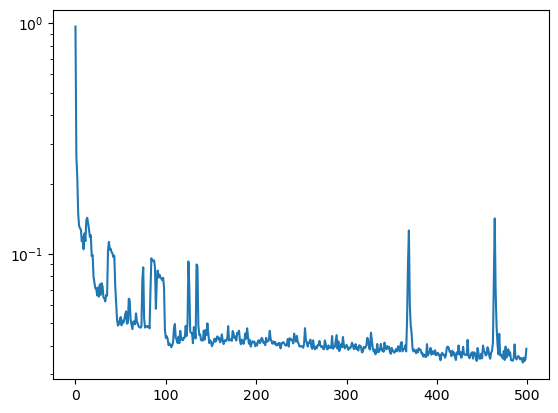

In [5]:
loss=np.load('PINO_train_Darcy_Flow.npy')
epoch=np.arange(len(loss))
plt.plot(epoch,loss)
plt.yscale('log')

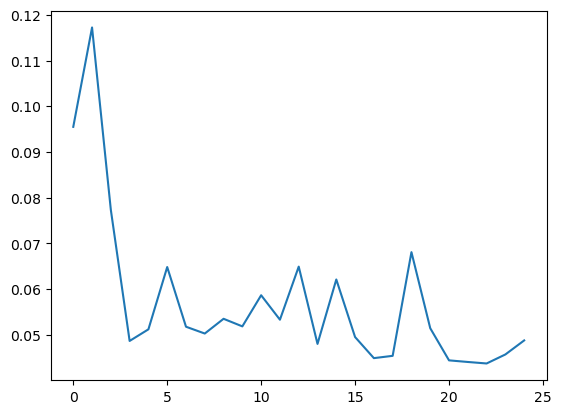

In [6]:
test_loss=np.load('PINO_test_Darcy_Flow.npy')
epoch=np.arange(len(test_loss))
plt.plot(epoch,test_loss)   

In [7]:
min(loss)

0.033786261825663536

In [ ]:
def get_dataloader(filepath,ntrain,ntest,batch_size,r,s):
    data = scio.loadmat(filepath)
    features=data['a']
    label=data['u']
    scaler=StandardScaler()
    features=scaler.fit_transform(features.reshape(-1,1)).reshape(features.shape)
    x_train = features[:ntrain, ::r, ::r]
    x_train = torch.from_numpy(x_train).float()
    y_train = label[:ntrain, ::r, ::r]
    y_train = torch.from_numpy(y_train)

    x_test = features[-ntest:, ::r, ::r]
    x_test = torch.from_numpy(x_test).float()
    y_test = label[-ntest:, ::r, ::r]
    y_test = torch.from_numpy(y_test)

    x = np.linspace(0, 1, s)
    y = np.linspace(0, 1, s)
    x, y = np.meshgrid(x, y)
    grid = np.stack((x,y),axis=-1)
    grid = torch.tensor(grid, dtype=torch.float)

    grid_train = grid.repeat(ntrain, 1, 1, 1)
    grid_test = grid.repeat(ntest, 1, 1, 1)

    train_loader = DataLoader(TensorDataset(x_train, y_train,grid_train),
                                            batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(TensorDataset(x_test, y_test,grid_test),
                                            batch_size=batch_size, shuffle=False)

    return train_loader,test_loader

filepath='../data_folder/darcyflow.mat'
ntrain=900
ntest=100
batch_size=32
r=4
s=64
train_loader,test_loader=get_dataloader(filepath,ntrain,ntest,batch_size,r,s)

In [6]:
x,y,grid=next(iter(train_loader))
print(x.shape)
print(y.shape)

torch.Size([32, 64, 64])
torch.Size([32, 64, 64])


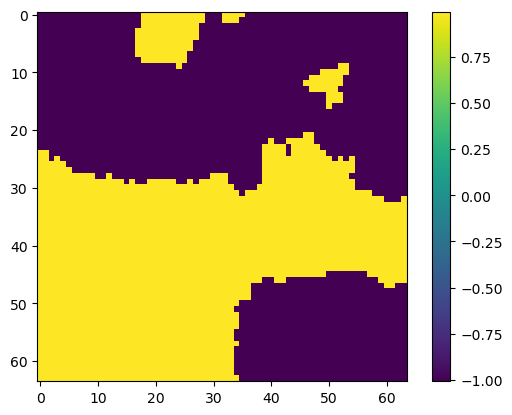

In [8]:
plt.imshow(x[0].numpy())
plt.colorbar()

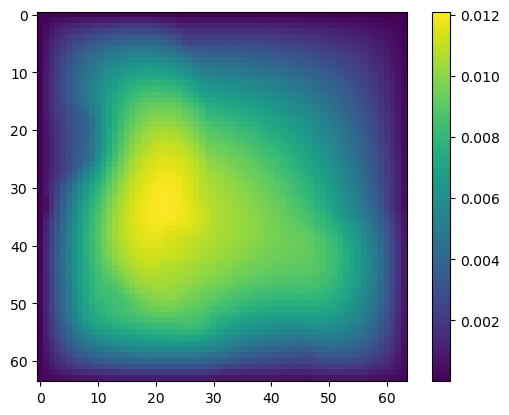

In [9]:
plt.imshow(y[0].numpy())
plt.colorbar()